In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import  RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
# os.chdir('drive/My Drive/Datasets')
os.listdir('.')

['heart.csv',
 'iris.csv',
 'pima-indians-diabetes.csv',
 'sonar.csv',
 'housing.csv',
 'winequality-white.csv',
 'auto.csv']

In [4]:
dataset = pd.read_csv('heart.csv')

In [5]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


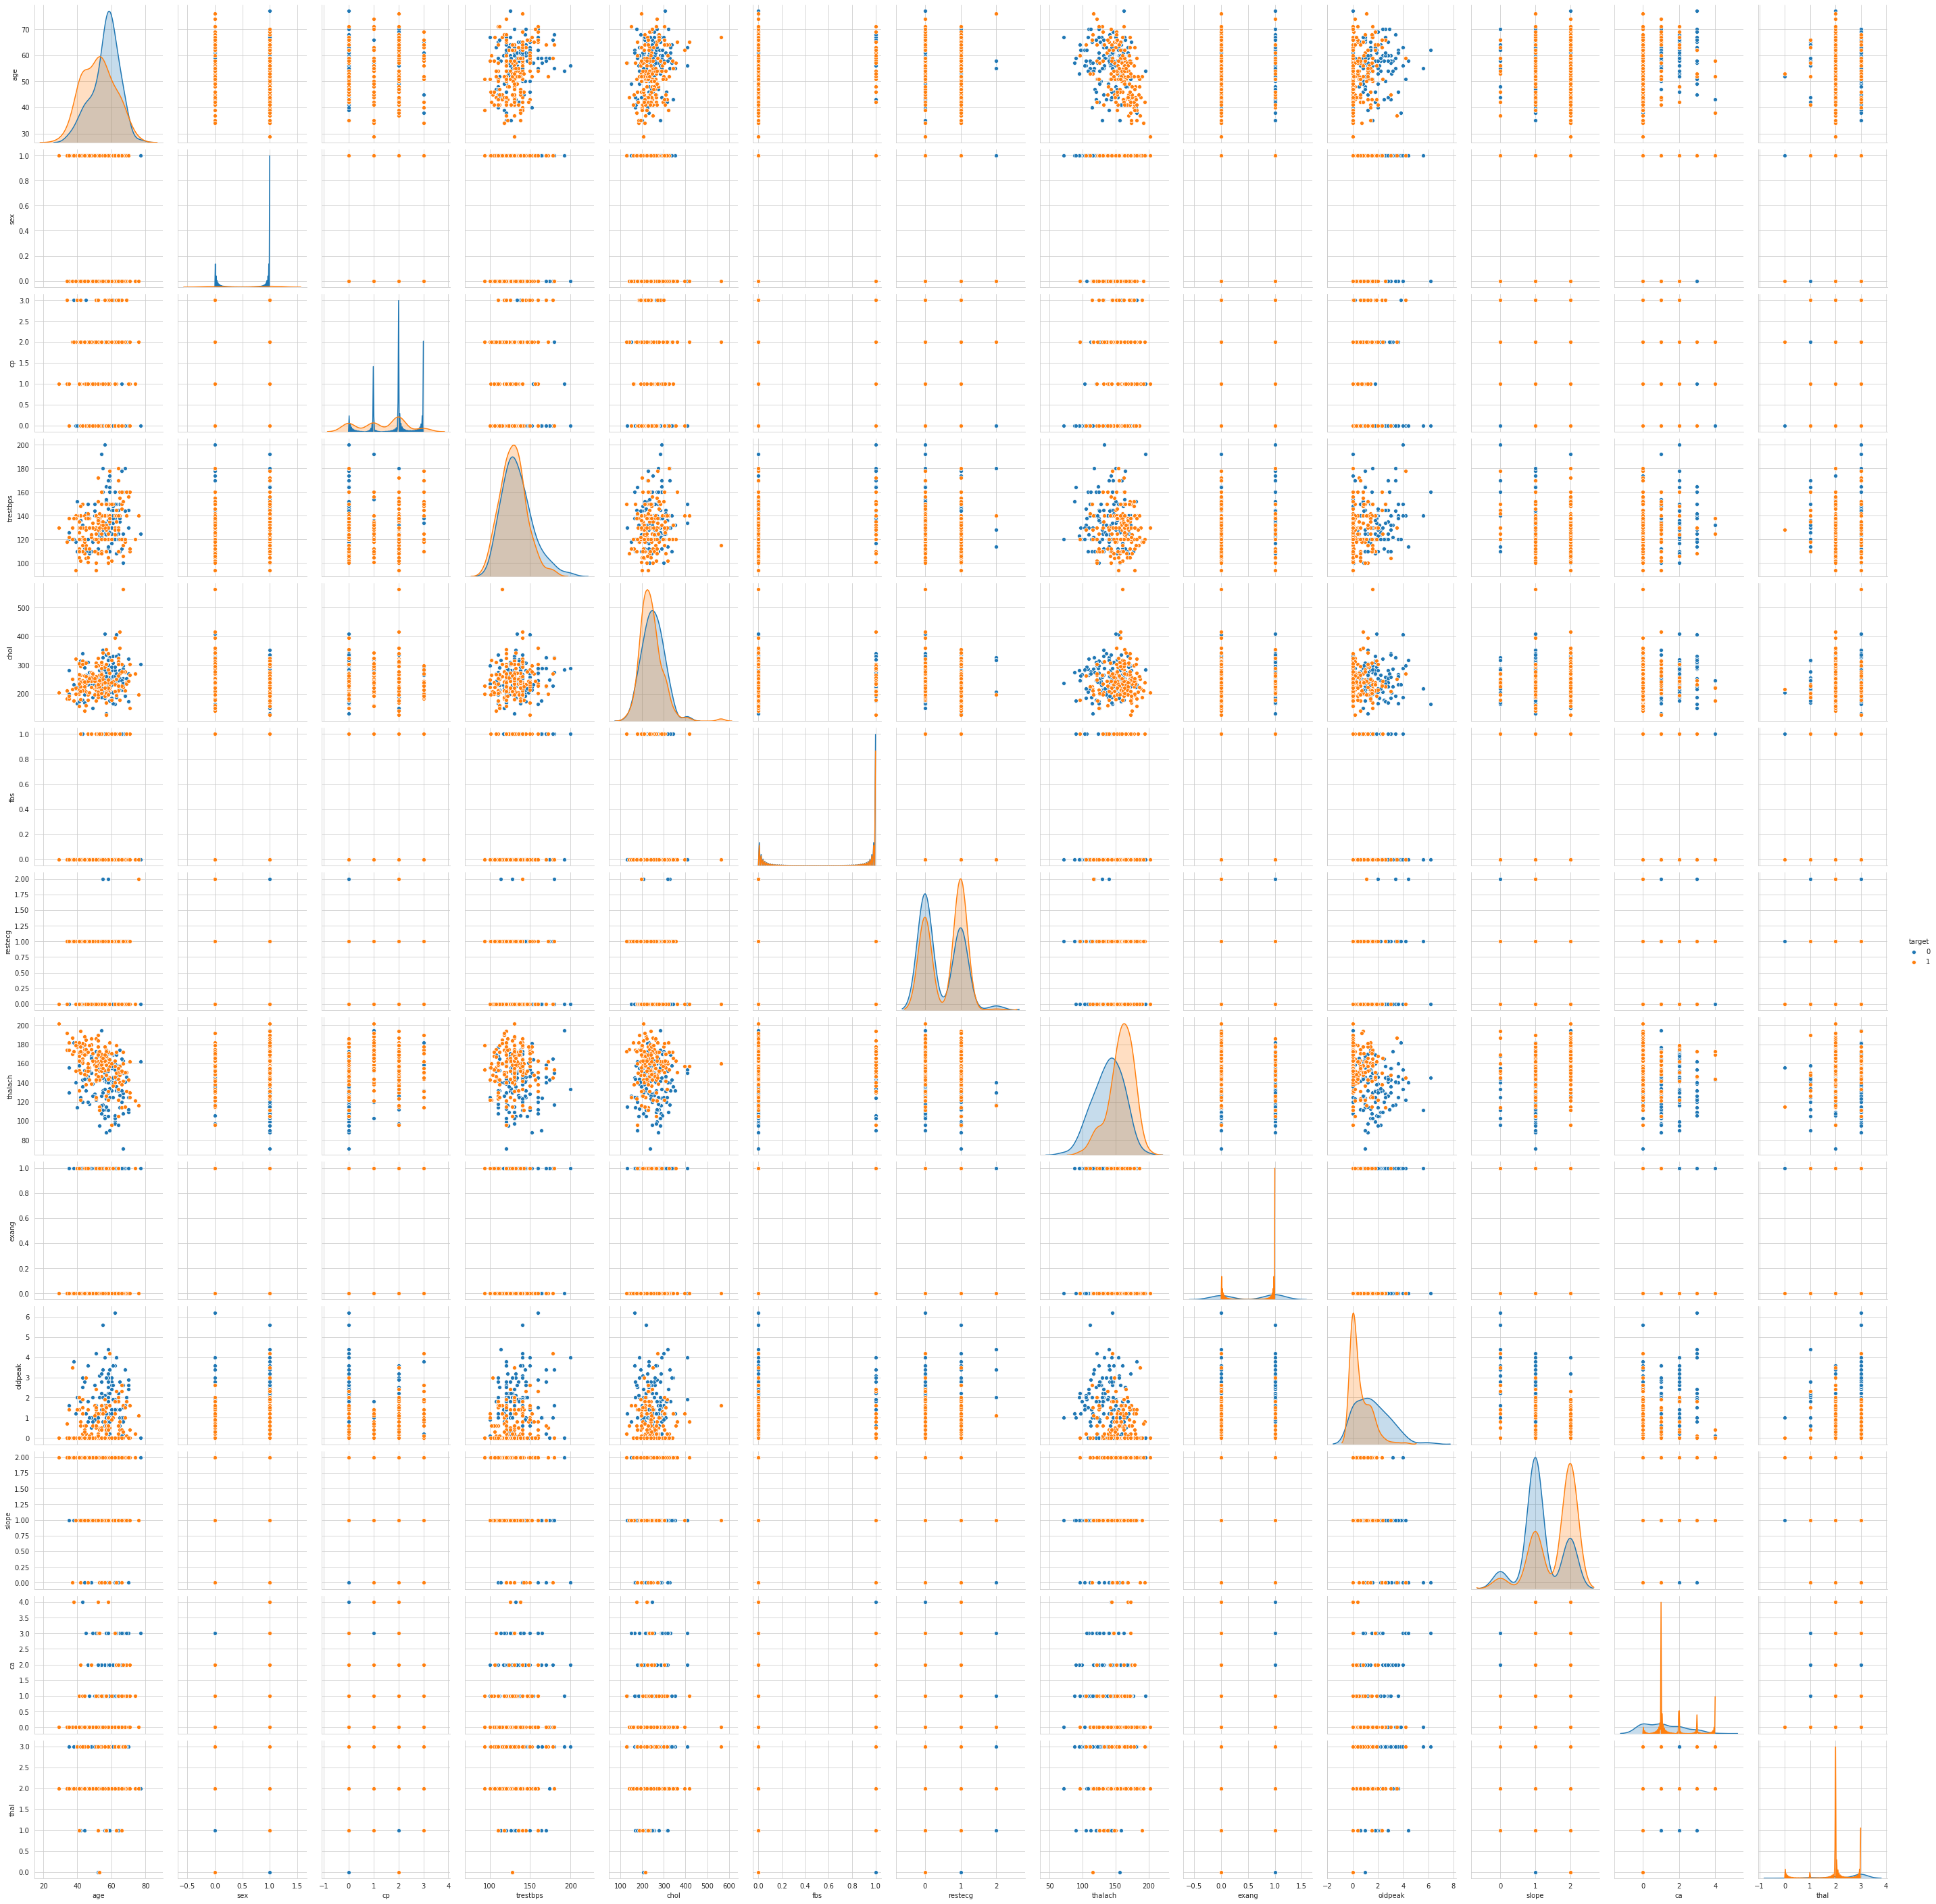

In [8]:
sb.set_style("whitegrid");
sb.pairplot(dataset, hue="target", height=3);
plt.show()

In [9]:
feature = dataset.drop(['target'], axis=1) #outcome tidak dibutuhkan
label = dataset['target'] #target prediksi

In [10]:
scaler = preprocessing.StandardScaler()

feature_scaled = scaler.fit_transform(feature.values) 

In [11]:
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label, test_size=0.2, random_state=10)

In [12]:
#Random Forest Classification
random_forest = RandomForestClassifier(n_estimators=800, bootstrap=True, max_features = "sqrt")
random_forest.fit(feature_train, label_train)

predictions = random_forest.predict(feature_train)

print("prediksi menggunakan training set")
print('Akurasi dari Testing Set: {:.3f}'.format(random_forest.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_train, predictions, average='macro'))
print("precision score")
print(precision_score(label_train, predictions, average='macro'))
print("recall score")
print(recall_score(label_train, predictions, average='macro'))

predictions = random_forest.predict(feature_test)

print("\nprediksi menggunakan testing set")
print('Akurasi dari Testing Set: {:.3f}'.format(random_forest.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_test, predictions, average='macro'))
print("precision score")
print(precision_score(label_test, predictions, average='macro'))
print("recall score")
print(recall_score(label_test, predictions, average='macro'))

prediksi menggunakan training set
Akurasi dari Testing Set: 0.803
f1 score
1.0
precision score
1.0
recall score
1.0

prediksi menggunakan testing set
Akurasi dari Testing Set: 0.803
f1 score
0.8006535947712419
precision score
0.7992424242424243
recall score
0.8038461538461539


In [22]:
#k-NN
knn = KNeighborsClassifier(19)
knn.fit(feature_train, label_train)

predictions = knn.predict(feature_train)

print("prediksi menggunakan training set")
print('Akurasi dari Testing Set: {:.3f}'.format(knn.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_train, predictions, average='macro'))
print("precision score")
print(precision_score(label_train, predictions, average='macro'))
print("recall score")
print(recall_score(label_train, predictions, average='macro'))

predictions = knn.predict(feature_test)

print("\nprediksi menggunakan testing set")
print('Akurasi dari Testing Set: {:.3f}'.format(knn.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_test, predictions, average='macro'))
print("precision score")
print(precision_score(label_test, predictions, average='macro'))
print("recall score")
print(recall_score(label_test, predictions, average='macro'))

prediksi menggunakan training set
Akurasi dari Testing Set: 0.803
f1 score
0.8311669236983182
precision score
0.8678642714570859
recall score
0.821820213731927

prediksi menggunakan testing set
Akurasi dari Testing Set: 0.803
f1 score
0.802801724137931
precision score
0.8076508620689655
recall score
0.8137362637362637


In [24]:
#GradienBoosting
GB_classi = GradientBoostingClassifier(n_estimators=50)
GB_classi.fit(feature_train, label_train)

predictions = GB_classi.predict(feature_train)

print("prediksi menggunakan training set")
print('Akurasi dari Training Set: {:.3f}'.format(GB_classi.score(feature_train, label_train))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_train, predictions, average='macro'))
print("precision score")
print(precision_score(label_train, predictions, average='macro'))
print("recall score")
print(recall_score(label_train, predictions, average='macro'))

predictions = GB_classi.predict(feature_test)

print("\nprediksi menggunakan testing set")
print('Akurasi dari Testing Set: {:.3f}'.format(GB_classi.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_test, predictions, average='macro'))
print("precision score")
print(precision_score(label_test, predictions, average='macro'))
print("recall score")
print(recall_score(label_test, predictions, average='macro'))

prediksi menggunakan training set
Akurasi dari Training Set: 0.979
f1 score
0.9787282667932423
precision score
0.9826388888888888
recall score
0.9757281553398058

prediksi menggunakan testing set
Akurasi dari Testing Set: 0.787
f1 score
0.7848032564450476
precision score
0.7839439655172413
recall score
0.7895604395604396


In [15]:
#SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(feature_train, label_train)

predictions = svm_classifier.predict(feature_train)

print("prediksi menggunakan training set")
print('Akurasi dari Training Set: {:.3f}'.format(svm_classifier.score(feature_train, label_train))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_train, predictions, average='macro'))
print("precision score")
print(precision_score(label_train, predictions, average='macro'))
print("recall score")
print(recall_score(label_train, predictions, average='macro'))

predictions = svm_classifier.predict(feature_test)

print("\nprediksi menggunakan testing set")
print('Akurasi dari Testing Set: {:.3f}'.format(svm_classifier.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_test, predictions, average='macro'))
print("precision score")
print(precision_score(label_test, predictions, average='macro'))
print("recall score")
print(recall_score(label_test, predictions, average='macro'))

prediksi menggunakan training set
Akurasi dari Training Set: 0.872
f1 score
0.8664245143599879
precision score
0.8776315789473684
recall score
0.8608297827757212

prediksi menggunakan testing set
Akurasi dari Testing Set: 0.754
f1 score
0.7530364372469636
precision score
0.7553763440860215
recall score
0.760989010989011


In [16]:
#Linear SVC
classifier_linear_svc = SVC()
classifier_linear_svc.fit(feature_train, label_train)

predictions = classifier_linear_svc.predict(feature_train)

print("prediksi menggunakan training set")
print('Akurasi dari Training Set: {:.3f}'.format(classifier_linear_svc.score(feature_train, label_train))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_train, predictions, average='macro'))
print("precision score")
print(precision_score(label_train, predictions, average='macro'))
print("recall score")
print(recall_score(label_train, predictions, average='macro'))

predictions = classifier_linear_svc.predict(feature_test)

print("\nprediksi menggunakan testing set")
print('Akurasi dari Testing Set: {:.3f}'.format(classifier_linear_svc.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_test, predictions, average='macro'))
print("precision score")
print(precision_score(label_test, predictions, average='macro'))
print("recall score")
print(recall_score(label_test, predictions, average='macro'))

prediksi menggunakan training set
Akurasi dari Training Set: 0.921
f1 score
0.9186756044500255
precision score
0.9261069580218516
recall score
0.9140532234406649

prediksi menggunakan testing set
Akurasi dari Testing Set: 0.820
f1 score
0.81889338731444
precision score
0.8209677419354839
recall score
0.828021978021978


In [17]:
#XGBoost
xgb_model = xgb.XGBClassifier(objective="reg:squarederror")
xgb_model.fit(feature_train, label_train)

predictions = xgb_model.predict(feature_train)

print("prediksi menggunakan training set")
print('Akurasi dari Training Set: {:.3f}'.format(xgb_model.score(feature_train, label_train))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_train, predictions, average='macro'))
print("precision score")
print(precision_score(label_train, predictions, average='macro'))
print("recall score")
print(recall_score(label_train, predictions, average='macro'))

predictions = xgb_model.predict(feature_test)

print("\nprediksi menggunakan testing set")
print('Akurasi dari Testing Set: {:.3f}'.format(xgb_model.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_test, predictions, average='macro'))
print("precision score")
print(precision_score(label_test, predictions, average='macro'))
print("recall score")
print(recall_score(label_test, predictions, average='macro'))

prediksi menggunakan training set
Akurasi dari Training Set: 0.979
f1 score
0.9787879319110145
precision score
0.9809154929577465
recall score
0.9769854019696864

prediksi menggunakan testing set
Akurasi dari Testing Set: 0.770
f1 score
0.768939393939394
precision score
0.7693548387096774
recall score
0.7752747252747253


In [18]:
#Gaussian Process Classifier
gaus_pc = GaussianProcessClassifier() 
gaus_pc.fit(feature_train, label_train)

predictions = gaus_pc.predict(feature_train)

print("prediksi menggunakan training set")
print('Akurasi dari Training Set: {:.3f}'.format(gaus_pc.score(feature_train, label_train))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_train, predictions, average='macro'))
print("precision score")
print(precision_score(label_train, predictions, average='macro'))
print("recall score")
print(recall_score(label_train, predictions, average='macro'))

predictions = gaus_pc.predict(feature_test)

print("\nprediksi menggunakan testing set")
print('Akurasi dari Testing Set: {:.3f}'.format(gaus_pc.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_test, predictions, average='macro'))
print("precision score")
print(precision_score(label_test, predictions, average='macro'))
print("recall score")
print(recall_score(label_test, predictions, average='macro'))

prediksi menggunakan training set
Akurasi dari Training Set: 0.996
f1 score
0.9957688609144155
precision score
0.9964285714285714
recall score
0.9951456310679612

prediksi menggunakan testing set
Akurasi dari Testing Set: 0.754
f1 score
0.7530364372469636
precision score
0.7553763440860215
recall score
0.760989010989011


In [19]:
#MLP Classifier
mlp_classi = MLPClassifier(hidden_layer_sizes=(3,), activation='logistic',
                       solver='adam', alpha=0.0001,learning_rate='constant', 
                      learning_rate_init=0.3)
mlp_classi.fit(feature_train, label_train)

predictions = mlp_classi.predict(feature_train)

print("prediksi menggunakan training set")
print('Akurasi dari Training Set: {:.3f}'.format(mlp_classi.score(feature_train, label_train))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_train, predictions, average='macro'))
print("precision score")
print(precision_score(label_train, predictions, average='macro'))
print("recall score")
print(recall_score(label_train, predictions, average='macro'))

predictions = mlp_classi.predict(feature_test)

print("\nprediksi menggunakan testing set")
print('Akurasi dari Testing Set: {:.3f}'.format(mlp_classi.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_test, predictions, average='macro'))
print("precision score")
print(precision_score(label_test, predictions, average='macro'))
print("recall score")
print(recall_score(label_test, predictions, average='macro'))

prediksi menggunakan training set
Akurasi dari Training Set: 0.917
f1 score
0.9154850876580289
precision score
0.9154850876580289
recall score
0.9154850876580289

prediksi menggunakan testing set
Akurasi dari Testing Set: 0.836
f1 score
0.8305555555555556
precision score
0.8355855855855856
recall score
0.8274725274725274


In [20]:
#ADA Boost
ada_boost = AdaBoostClassifier(n_estimators=250, random_state=15)
ada_boost.fit(feature_train, label_train)

predictions = ada_boost.predict(feature_train)

print("prediksi menggunakan training set")
print('Akurasi dari Training Set: {:.3f}'.format(ada_boost.score(feature_train, label_train))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_train, predictions, average='macro'))
print("precision score")
print(precision_score(label_train, predictions, average='macro'))
print("recall score")
print(recall_score(label_train, predictions, average='macro'))

predictions = ada_boost.predict(feature_test)

print("\nprediksi menggunakan testing set")
print('Akurasi dari Testing Set: {:.3f}'.format(ada_boost.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_test, predictions, average='macro'))
print("precision score")
print(precision_score(label_test, predictions, average='macro'))
print("recall score")
print(recall_score(label_test, predictions, average='macro'))

prediksi menggunakan training set
Akurasi dari Training Set: 1.000
f1 score
1.0
precision score
1.0
recall score
1.0

prediksi menggunakan testing set
Akurasi dari Testing Set: 0.738
f1 score
0.7342047930283225
precision score
0.7332251082251082
recall score
0.7368131868131869


In [21]:
#DecisionTreeClassifier
dec_tc = DecisionTreeClassifier()

dec_tc.fit(feature_train, label_train)

predictions = dec_tc.predict(feature_train)

print("prediksi menggunakan training set")
print('Akurasi dari Training Set: {:.3f}'.format(dec_tc.score(feature_train, label_train))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_train, predictions, average='macro'))
print("precision score")
print(precision_score(label_train, predictions, average='macro'))
print("recall score")
print(recall_score(label_train, predictions, average='macro'))

predictions = dec_tc.predict(feature_test)

print("\nprediksi menggunakan testing set")
print('Akurasi dari Testing Set: {:.3f}'.format(dec_tc.score(feature_test, label_test))) # .score() -> Accuracy
print("f1 score")
print(f1_score(label_test, predictions, average='macro'))
print("precision score")
print(precision_score(label_test, predictions, average='macro'))
print("recall score")
print(recall_score(label_test, predictions, average='macro'))

prediksi menggunakan training set
Akurasi dari Training Set: 1.000
f1 score
1.0
precision score
1.0
recall score
1.0

prediksi menggunakan testing set
Akurasi dari Testing Set: 0.787
f1 score
0.7866559052999731
precision score
0.79491341991342
recall score
0.7994505494505495


Untuk data Heart.csv Nilai Akurasi yang paling tinggi didapatkan dengan menggunakan algoritma MLP Classifier dengan nilai Akurasi : 0.836